<a href="https://colab.research.google.com/github/deepavarshini09/SoftNexisTechnology_Tasks/blob/main/task1_snt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beginner-Friendly Datasets (3)

## 1. Customers Dataset
○ Description: Simulated e-commerce customer records with duplicates, missing IDs, inconsistent formatting (names, dates, regions), and invalid entries.

○ Size: 100–2M records.


In [78]:
# uploaded the required dataset through file section (temporary)

In [79]:
#import necessary libraries
import pandas as pd

(1) DATA INGESTION:

In [80]:
# Load data
df = pd.read_csv("customers-100.csv")

In [81]:
# Basic Details Check
print("Shape:", df.shape)
print("\nBasic Info:")
print(df.info())
print("\nMissing values per column:\n", df.isna().sum())

Shape: (100, 12)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Index              100 non-null    int64 
 1   Customer Id        100 non-null    object
 2   First Name         100 non-null    object
 3   Last Name          100 non-null    object
 4   Company            100 non-null    object
 5   City               100 non-null    object
 6   Country            100 non-null    object
 7   Phone 1            100 non-null    object
 8   Phone 2            100 non-null    object
 9   Email              100 non-null    object
 10  Subscription Date  100 non-null    object
 11  Website            100 non-null    object
dtypes: int64(1), object(11)
memory usage: 9.5+ KB
None

Missing values per column:
 Index                0
Customer Id          0
First Name           0
Last Name            0
Company              0
City    

(2) DE-DUPLICATION

In [82]:
# Check for exact duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [83]:
# No duplicates exists, yet implementing the drop duplicates, which won't have any effects
# Drop duplicates only if they exist
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape:", df.shape)
else:
    print("No duplicates found. Proceeding without changes.")

No duplicates found. Proceeding without changes.


(3) COLUMN MANAGEMENT

In [84]:
# Drop irrelevant columns
columns_to_drop = ['Index', 'Phone 2', 'Website']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [85]:
for col in df.columns:
    print(col)

Customer Id
First Name
Last Name
Company
City
Country
Phone 1
Email
Subscription Date


In [86]:
# Rename columns for clarity and code compatibility
df = df.rename(columns={
    'Customer Id': 'customer_id',
    'First Name': 'first_name',
    'Last Name': 'last_name',
    'Company': 'company',
    'City': 'city',
    'Country': 'country',
    'Phone 1': 'phone',
    'Email': 'email',
    'Subscription Date': 'subscription_date'
})

In [87]:
# Show updated columns
print("Columns after management:")
for col in df.columns:
    print(col)

Columns after management:
customer_id
first_name
last_name
company
city
country
phone
email
subscription_date


(4) MISSING VALUE HANDLING

In [88]:
# Final check to confirm no missing values introduced
missing_summary = df.isna().sum()
print("Missing values check after column management):\n", missing_summary)

Missing values check after column management):
 customer_id          0
first_name           0
last_name            0
company              0
city                 0
country              0
phone                0
email                0
subscription_date    0
dtype: int64


In [89]:
# No action required since all values are present
if missing_summary.sum() == 0:
    print("No missing values. Skipping deletion/imputation steps.")
else:
    print("Unexpected missing values found — consider imputation.")

No missing values. Skipping deletion/imputation steps.


(5) DATA TYPE CORRECTION

In [90]:
# Convert 'subscription_date' to datetime
df['subscription_date'] = pd.to_datetime(df['subscription_date'], errors='coerce')

# Verify the change
print("Data type of 'subscription_date' after conversion:", df['subscription_date'].dtype)

Data type of 'subscription_date' after conversion: datetime64[ns]


(6) FORMAT STANDARDIZATION

In [91]:
# Identify object (string) columns to normalize
string_cols = df.select_dtypes(include='object').columns

# Apply lowercase and strip whitespace
for col in string_cols:
    df[col] = df[col].str.lower().str.strip()

In [92]:
# Review cleaned values for key categorical columns
for col in ['country', 'city']:
    if col in df.columns:
        print(f"Unique values in '{col}' after standardization:")
        print(df[col].unique())

Unique values in 'country' after standardization:
['chile' 'djibouti' 'antigua and barbuda' 'dominican republic'
 'slovakia (slovak republic)' 'bosnia and herzegovina' 'pitcairn islands'
 'bulgaria' 'cyprus' 'timor-leste' 'guernsey' 'vietnam' 'togo' 'sri lanka'
 'singapore' 'oman' 'western sahara' 'mozambique'
 'south georgia and the south sandwich islands' 'french polynesia' 'malta'
 'netherlands' 'paraguay' "lao people's democratic republic" 'albania'
 'panama' 'belarus' 'switzerland' 'saint vincent and the grenadines'
 'tanzania' 'zimbabwe' 'denmark' 'liechtenstein'
 'united states of america' 'bahamas' 'belize' 'uruguay' 'solomon islands'
 'montenegro' 'poland' 'burkina faso' 'bolivia' 'monaco' 'palau'
 'uzbekistan' 'ghana' 'united arab emirates' 'canada' 'algeria'
 'swaziland' 'madagascar' 'ecuador' 'palestinian territory'
 'saint barthelemy' 'sao tome and principe' 'portugal' 'ethiopia'
 'liberia' 'lithuania' 'new caledonia' 'kiribati'
 'french southern territories' 'iran' 'moroc

SAVING THE CLEANED DATASET

In [93]:
df.to_csv("cleaned_customers.csv", index=False)
print("Cleaned dataset saved as 'cleaned_customers.csv'")

Cleaned dataset saved as 'cleaned_customers.csv'


## 2. People Dataset
○ Description: Demographic data with mixed date formats, inconsistent job
titles, missing values, and malformed phone numbers.

○ Size: 100–2M records.



In [ ]:
# uploaded the required dataset through file section (temporary)

In [ ]:
#import necessary libraries
import pandas as pd

(1) DATA INGESTION

In [ ]:
# Load data
df = pd.read_csv("people-100.csv")

In [ ]:
# Basic Details Check
print("Shape:", df.shape)
print("\nBasic Info:")
print(df.info())
print("\nMissing values per column:\n", df.isna().sum())

Shape: (100, 9)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          100 non-null    int64 
 1   User Id        100 non-null    object
 2   First Name     100 non-null    object
 3   Last Name      100 non-null    object
 4   Sex            100 non-null    object
 5   Email          100 non-null    object
 6   Phone          100 non-null    object
 7   Date of birth  100 non-null    object
 8   Job Title      100 non-null    object
dtypes: int64(1), object(8)
memory usage: 7.2+ KB
None

Missing values per column:
 Index            0
User Id          0
First Name       0
Last Name        0
Sex              0
Email            0
Phone            0
Date of birth    0
Job Title        0
dtype: int64


(2) DEDUPLICATION

In [ ]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape:", df.shape)
else:
    print("No duplicates found. Proceeding without changes.")


Number of duplicate rows: 0
No duplicates found. Proceeding without changes.


(3) COLUMN MANAGEMENT

In [ ]:
# Drop irrelevant columns
df = df.drop(columns=['Index'], errors='ignore')

In [ ]:
# Renaming for clarity
df = df.rename(columns={
    'User Id': 'user_id',
    'First Name': 'first_name',
    'Last Name': 'last_name',
    'Sex': 'sex',
    'Email': 'email',
    'Phone': 'phone',
    'Date of birth': 'dob',
    'Job Title': 'job_title'
})

In [ ]:
# Show updated column names
print("Columns after renaming:")
for col in df.columns:
    print(col)

Columns after renaming:
user_id
first_name
last_name
sex
email
phone
dob
job_title


(4) MISSING VALUE HANDLING

In [ ]:
# Check for any missing values
missing_summary = df.isna().sum()
print("Missing values per column:\n", missing_summary)

if missing_summary.sum() == 0:
    print("No missing values. Skipping imputation/deletion.")
else:
    print("Missing values detected — handle as needed.")

Missing values per column:
 user_id       0
first_name    0
last_name     0
sex           0
email         0
phone         0
dob           0
job_title     0
dtype: int64
No missing values. Skipping imputation/deletion.


(5) DATA TYPE CORRECTION

In [ ]:
# Convert 'dob' to datetime
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
print("Data type of 'dob':", df['dob'].dtype)

# Check for invalid conversions
print("Invalid date values after conversion:", df['dob'].isna().sum())


Data type of 'dob': datetime64[ns]
Invalid date values after conversion: 0


(6) FORMAT STANDARDIZATION

In [ ]:
# Identify string columns
string_cols = df.select_dtypes(include='object').columns

In [ ]:
# Normalize: lowercase and strip
for col in string_cols:
    df[col] = df[col].str.lower().str.strip()

In [ ]:
# Check for inconsistent categories
for col in ['sex', 'job_title']:
    if col in df.columns:
        print(f"Unique values in '{col}':")
        print(df[col].unique())

Unique values in 'sex':
['male' 'female']
Unique values in 'job_title':
['games developer' 'phytotherapist' 'homeopath' 'market researcher'
 'veterinary surgeon' 'waste management officer' 'intelligence analyst'
 'hydrogeologist' 'lawyer' 'engineer, site'
 'advertising account executive' 'warden/ranger'
 'scientist, clinical (histocompatibility and immunogenetics)'
 'social worker' 'agricultural consultant'
 'sport and exercise psychologist' 'secretary/administrator'
 'audiological scientist' 'teacher, adult education' 'paediatric nurse'
 'scientist, marine' 'commercial horticulturist'
 'outdoor activities/education manager' 'drilling engineer'
 'systems analyst' 'conservation officer, nature' 'counsellor'
 'recycling officer' 'art gallery manager' 'gaffer' 'food technologist'
 'building services engineer' 'seismic interpreter' 'engineer, biomedical'
 'set designer' 'research scientist (life sciences)'
 'accountant, chartered management' 'surveyor, quantity'
 'information systems manag

SAVING THE CLEANED DATASET

In [ ]:
# Save cleaned dataset
df.to_csv("cleaned_people.csv", index=False)
print("Cleaned dataset saved as 'cleaned_people.csv'")


Cleaned dataset saved as 'cleaned_people.csv'


## 3. Organizations Dataset
○ Description: Company records with inconsistent industry categories,
missing employee counts, and website formatting errors.

○ Size: 100–2M records.



In [60]:
# uploaded the required dataset through file section (temporary)

In [61]:
#import necessary libraries
import pandas as pd

(1) DATA INGESTION

In [62]:
# Load data
df = pd.read_csv("organizations-100.csv")

In [63]:
# Basic Details Check
print("Shape:", df.shape)
print("\nBasic Info:")
print(df.info())
print("\nMissing values per column:\n", df.isna().sum())

Shape: (100, 9)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Index                100 non-null    int64 
 1   Organization Id      100 non-null    object
 2   Name                 100 non-null    object
 3   Website              100 non-null    object
 4   Country              100 non-null    object
 5   Description          100 non-null    object
 6   Founded              100 non-null    int64 
 7   Industry             100 non-null    object
 8   Number of employees  100 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 7.2+ KB
None

Missing values per column:
 Index                  0
Organization Id        0
Name                   0
Website                0
Country                0
Description            0
Founded                0
Industry               0
Number of employees    0
dtype: int64


(2) DEDUPLICATION

In [64]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape:", df.shape)
else:
    print("No duplicates found. Proceeding without changes.")

Number of duplicate rows: 0
No duplicates found. Proceeding without changes.


(3) COLUMN MANAGEMENT

In [65]:
# Drop unnecessary column
df = df.drop(columns=['Index'], errors='ignore')

In [66]:
for col in df.columns:
    print(col)

Organization Id
Name
Website
Country
Description
Founded
Industry
Number of employees


In [67]:
# Rename for code-friendliness
df = df.rename(columns={
    'Organization Id': 'org_id',
    'Name': 'name',
    'Website': 'website',
    'Country': 'country',
    'Description': 'description',
    'Founded': 'founded',
    'Industry': 'industry',
    'Number of employees': 'num_employees'
})

In [68]:
print("columns after renaming:")
for col in df.columns:
    print(col)

columns after renaming:
org_id
name
website
country
description
founded
industry
num_employees


(4) MISSING VALUE HANDLING

In [69]:
# Check for missing values
missing_summary = df.isna().sum()
print("Missing values per column:\n", missing_summary)

if missing_summary.sum() == 0:
    print("No missing values. Skipping deletion/imputation.")
else:
    print("Missing values found — investigate further.")

Missing values per column:
 org_id           0
name             0
website          0
country          0
description      0
founded          0
industry         0
num_employees    0
dtype: int64
No missing values. Skipping deletion/imputation.


(5) DATA TYPE CORRECTION

In [70]:
print("Data types of all columns:\n")
print(df.dtypes)

Data types of all columns:

org_id           object
name             object
website          object
country          object
description      object
founded           int64
industry         object
num_employees     int64
dtype: object


In [71]:
# Since the dataset is small the data type is manually checked and proceeded with the next step

(6) FORMAT STANDARDIZATION

In [72]:
# Identify string columns
string_cols = df.select_dtypes(include='object').columns

In [73]:
# Apply lowercase and strip whitespace
for col in string_cols:
    df[col] = df[col].str.lower().str.strip()

In [74]:
# Review values in key categorical columns
for col in ['country', 'industry']:
    print(f"Unique values in '{col}':")
    print(df[col].unique())

Unique values in 'country':
['papua new guinea' 'finland' 'china' 'turkmenistan' 'mauritius' 'bahamas'
 'pakistan' 'heard island and mcdonald islands' 'kuwait' 'uzbekistan'
 'bouvet island (bouvetoya)' 'denmark' 'liberia' 'united arab emirates'
 'sweden' 'honduras' 'uganda' 'hong kong' 'botswana' 'korea' 'luxembourg'
 'guadeloupe' 'monaco' 'belgium' 'south africa' 'romania' 'czech republic'
 'christmas island' 'philippines' 'australia' 'chad' 'zimbabwe' 'nepal'
 'taiwan' 'kyrgyz republic' 'bolivia' 'kenya' 'guatemala' 'belarus'
 'jersey' 'grenada' 'cape verde' 'trinidad and tobago' 'benin'
 'western sahara' 'northern mariana islands' 'germany' 'canada' 'tonga'
 'french southern territories' "cote d'ivoire" 'mayotte' 'cayman islands'
 'nigeria' 'marshall islands' 'palau' 'turkey' 'timor-leste' 'vietnam'
 'reunion' 'brazil' 'eritrea' 'united states virgin islands'
 'falkland islands (malvinas)' 'netherlands antilles' 'guernsey' 'uruguay'
 'suriname' 'mongolia' 'svalbard & jan mayen islan

In [75]:
# Optional minor fix: remove extra spaces around slashes and hyphens
df['industry'] = df['industry'].str.replace(r'\s*/\s*', ' / ', regex=True)
df['industry'] = df['industry'].str.replace(r'\s*-\s*', '-', regex=True)


In [76]:
print(df['industry'].unique())

['plastics' 'glass / ceramics / concrete' 'public safety' 'automotive'
 'transportation' 'primary / secondary education' 'publishing industry'
 'import / export' 'outsourcing / offshoring' 'food / beverages'
 'museums / institutions' 'medical practice' 'maritime'
 'facilities services'
 'investment management / hedge fund / private equity'
 'architecture / planning' 'wholesale' 'construction'
 'luxury goods / jewelry' 'pharmaceuticals' 'insurance'
 'real estate / mortgage' 'banking / mortgage' 'legal services'
 'logistics / procurement' 'civil engineering'
 'mechanical or industrial engineering' 'hospitality'
 'venture capital / vc' 'utilities' 'human resources / hr'
 'legislative office' 'music' 'electrical / electronic manufacturing'
 'non-profit / volunteering' 'writing / editing'
 'capital markets / hedge fund / private equity'
 'individual / family services' 'online publishing'
 'civic / social organization' 'arts / crafts' 'consumer goods' 'printing'
 'mental health care' 'manage

SAVING THE CLEANED DATASET

In [77]:
# Save the cleaned dataset
df.to_csv("cleaned_organizations.csv", index=False)
print("Saved as 'cleaned_organizations.csv'")


Saved as 'cleaned_organizations.csv'


# Intermediate Datasets (3)

## Retail Sales Data
○ Description: Sales transactions with date parsing issues, outliers in
sales/quantity, and store/item ID inconsistencies.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('train.csv')

In [39]:
data

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [40]:
# Display the first few rows of the dataset
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [41]:
# Get summary statistics
data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [42]:
# Check for missing values
data.isnull().sum()

,0
date,0
store,0
item,0
sales,0


In [43]:
# Create a dictionary of medians for existing numeric columns
medians = {col: data[col].median() for col in ['store', 'item', 'sales'] if col in data.columns}

In [44]:
# Fill numeric columns with median
numeric_cols = data.select_dtypes(include=['number']).columns
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())

In [45]:
# Fill categorical columns with mode
categorical_cols = data.select_dtypes(exclude=['number']).columns
for col in categorical_cols:
    if not data[col].mode().empty:  # Check if mode exists
        data[col] = data[col].fillna(data[col].mode()[0])

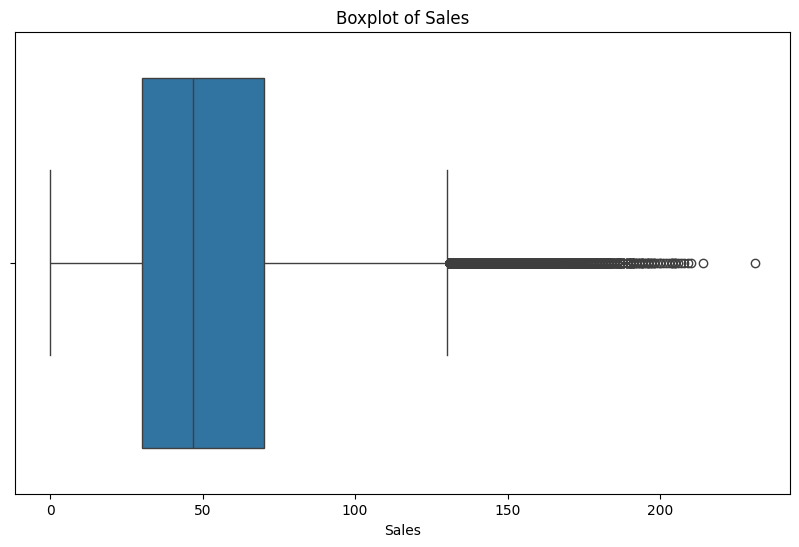

In [46]:
# Plotting boxplots to detect outliers in the 'sales' column
if 'sales' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['sales'])
    plt.title('Boxplot of Sales')
    plt.xlabel('Sales')
    plt.show()
else:
    print("Column 'sales' not found in dataset. Skipping boxplot.")


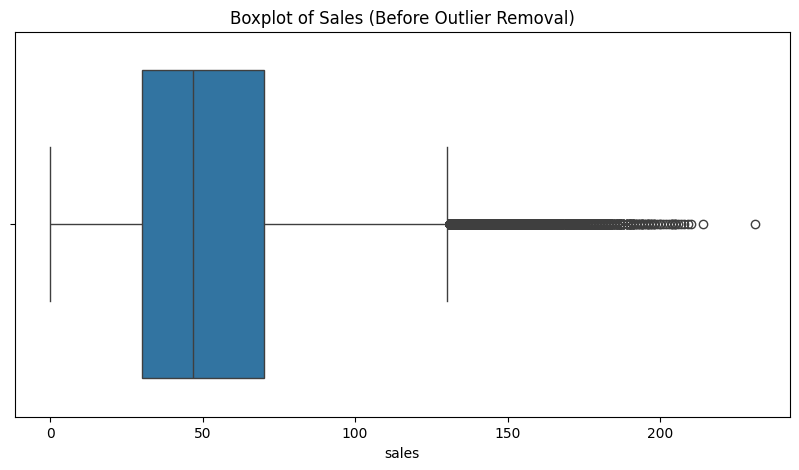


Sales statistics BEFORE removal:
count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sales, dtype: float64

Rows before: 913000, Rows after: 901033, Outliers removed: 11967


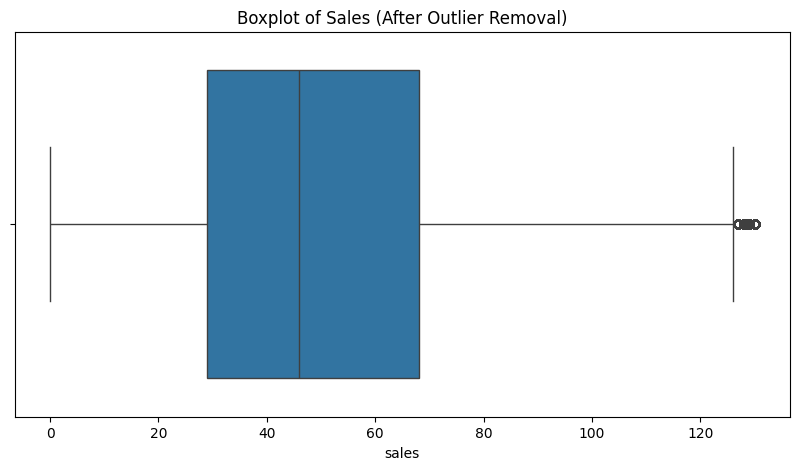


Sales statistics AFTER removal:
count    901033.000000
mean         51.032028
std          26.932926
min           0.000000
25%          29.000000
50%          46.000000
75%          68.000000
max         130.000000
Name: sales, dtype: float64


In [47]:
# ✅ Outlier detection & removal for 'sales' with confirmation steps
if 'sales' in data.columns:
    # 1. Plot boxplot BEFORE removal
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data['sales'])
    plt.title('Boxplot of Sales (Before Outlier Removal)')
    plt.show()

    # Store stats before
    print("\nSales statistics BEFORE removal:")
    print(data['sales'].describe())

    # 2. Calculate IQR and filter
    Q1 = data['sales'].quantile(0.25)
    Q3 = data['sales'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    before = len(data)
    data = data[(data['sales'] >= lower_bound) & (data['sales'] <= upper_bound)]
    after = len(data)

    print(f"\nRows before: {before}, Rows after: {after}, Outliers removed: {before - after}")

    # 3. Plot boxplot AFTER removal
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data['sales'])
    plt.title('Boxplot of Sales (After Outlier Removal)')
    plt.show()

    # Store stats after
    print("\nSales statistics AFTER removal:")
    print(data['sales'].describe())

else:
    print("Column 'sales' not found. Skipping outlier removal.")


In [48]:
# sales data is now cleaner and less influenced by extreme outliers

In [50]:
# ✅ Feature extraction only if date columns exist
date_cols = ['Order Date', 'Ship Date']
for col in date_cols:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')
    else:
        print(f"Column '{col}' not found. Skipping feature creation for this column.")

# Create new features only for columns that exist
if all(c in data.columns for c in date_cols):
    data['Order Year'] = data['Order Date'].dt.year
    data['Order Month'] = data['Order Date'].dt.month
    data['Order Day'] = data['Order Date'].dt.day

    data['Ship Year'] = data['Ship Date'].dt.year
    data['Ship Month'] = data['Ship Date'].dt.month
    data['Ship Day'] = data['Ship Date'].dt.day


Column 'Order Date' not found. Skipping feature creation for this column.
Column 'Ship Date' not found. Skipping feature creation for this column.


In [94]:
# Convert Categorical Variables into Dummy Variables
data = pd.get_dummies(data, drop_first=True)

# Scale Numeric Columns
from sklearn.preprocessing import StandardScaler
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Verify Transformations
print("\n✅ First few rows after preprocessing:")
print(data.head())

print("\n✅ Missing values check after processing:")
print(data.isnull().sum())


✅ First few rows after preprocessing:
      store      item     sales  date_2013-01-02  date_2013-01-03  \
0 -1.570605 -1.694939 -1.412102            False            False   
1 -1.570605 -1.694939 -1.486361             True            False   
2 -1.570605 -1.694939 -1.374973            False             True   
3 -1.570605 -1.694939 -1.412102            False            False   
4 -1.570605 -1.694939 -1.523490            False            False   

   date_2013-01-04  date_2013-01-05  date_2013-01-06  date_2013-01-07  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3             True            False            False            False   
4            False             True            False            False   

   date_2013-01-08  ...  date_2017-12-22  date_2017-12-23  date_2017-12-24  \
0            False  ...      

In [95]:
import os
print(os.listdir())

['.config', 'preprocessed_retail_sales_data.csv', 'drive', 'organizations-100.csv', 'cleaned_customers.csv', 'customers-100.csv', 'people-100.csv', 'train.csv', 'cleaned_organizations.csv', 'sample_data']


In [96]:
# Create a smaller sample (10,000 rows) to upload quickly
sample_data = data.sample(n=10000, random_state=42)
sample_data.to_csv("cleaned_retail_sales_sample.csv", index=False)

In [97]:
# Create a smaller sample of 5,000 rows
smaller_sample = data.sample(n=5000, random_state=42)
smaller_sample.to_csv("cleaned_retail_sales_small_sample.csv", index=False)

In [98]:
smaller_sample.to_csv("cleaned_retail_sales_small_sample.csv", index=False)
import zipfile

with zipfile.ZipFile("cleaned_retail_sales_small_sample.zip", "w", zipfile.ZIP_DEFLATED) as z:
    z.write("cleaned_retail_sales_small_sample.csv")


## Spotify Streaming History
Description: 149k+ music logs with timestamp errors, missing track IDs, and inconsistent artist names.

In [114]:
# starting with the data ingestion process

In [115]:
import pandas as pd

# Load the Spotify history dataset
df = pd.read_csv("spotify_history.csv")

# Initial sanity checks
print(df.shape)
print(df.info())
print(df.head())

(149860, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB
None
        spotify_track_uri                   ts    platform  ms_played  \
0  2J3n32GeLmMjwuAzyhcSNe  2013-07-08 02:44:34  web player       3185   
1  1oHxIPqJyvAYHy0PVrDU98  2013-07-08 02:

In [116]:
# de-duplication
# Remove duplicate rows if any
df = df.drop_duplicates()

# Optional: Check for duplicate track IDs (spotify_track_uri)
print(df["spotify_track_uri"].duplicated().sum())

132148


In [117]:
print("\nSample row before modification:")
print(df.iloc[0])


Sample row before modification:
spotify_track_uri    2J3n32GeLmMjwuAzyhcSNe
ts                      2013-07-08 02:44:34
platform                         web player
ms_played                              3185
track_name              Say It, Just Say It
artist_name                    The Mowgli's
album_name             Waiting For The Dawn
reason_start                       autoplay
reason_end                         clickrow
shuffle                               False
skipped                               False
Name: 0, dtype: object


In [118]:
# Column management
# Drop irrelevant or redundant columns if not needed for analysis
# (Assume 'platform' might be dropped if it’s the same throughout)
df = df.drop(columns=["platform"])  # Only if platform is not useful

# Rename columns for clarity
df.rename(columns={
    "spotify_track_uri": "track_uri",
    "ms_played": "play_duration_ms",
    "track_name": "track",
    "artist_name": "artist",
    "album_name": "album",
    "reason_start": "start_reason",
    "reason_end": "end_reason"
}, inplace=True)

# Reorder if necessary
df = df[[
    "track_uri", "track", "artist", "album", "play_duration_ms", "start_reason",
    "end_reason", "shuffle", "skipped"
]]

In [119]:
# how did the modification changed the data?:
print("\nAfter Column Management:")
print("Columns after renaming and reordering:")
print(df.columns.tolist())

print("\nSample row after modification:")
print(df.iloc[0])


After Column Management:
Columns after renaming and reordering:
['track_uri', 'track', 'artist', 'album', 'play_duration_ms', 'start_reason', 'end_reason', 'shuffle', 'skipped']

Sample row after modification:
track_uri           2J3n32GeLmMjwuAzyhcSNe
track                  Say It, Just Say It
artist                        The Mowgli's
album                 Waiting For The Dawn
play_duration_ms                      3185
start_reason                      autoplay
end_reason                        clickrow
shuffle                              False
skipped                              False
Name: 0, dtype: object


In [120]:
# Check missing values
print(df.isna().sum())

# Drop rows where essential fields are missing
df = df.dropna(subset=["track_uri", "track"])

# Fill missing artist and album with 'Unknown'
df["artist"] = df["artist"].fillna("Unknown")
df["album"] = df["album"].fillna("Unknown")

# Fill missing duration with 0
df["play_duration_ms"] = df["play_duration_ms"].fillna(0)

track_uri             0
track                 0
artist                0
album                 0
play_duration_ms      0
start_reason        143
end_reason          117
shuffle               0
skipped               0
dtype: int64


In [121]:
# Handling missing values
df["start_reason"] = df["start_reason"].fillna("unknown")
df["end_reason"] = df["end_reason"].fillna("unknown")

In [122]:
# Data Type Correction

# Convert 'shuffle' and 'skipped' to boolean
df["shuffle"] = df["shuffle"].astype(bool)
df["skipped"] = df["skipped"].astype(bool)

# Ensure 'play_duration_ms' is numeric
df["play_duration_ms"] = pd.to_numeric(df["play_duration_ms"], errors="coerce")

# Optional: Convert play duration to minutes
df["play_duration_min"] = df["play_duration_ms"] / 60000

# If a timestamp column like 'ts' exists, convert to datetime
if "ts" in df.columns:
    df["ts"] = pd.to_datetime(df["ts"], errors="coerce")

# Confirm data types (optional)
print("\nUpdated Data Types:")
print(df.dtypes)



Updated Data Types:
track_uri             object
track                 object
artist                object
album                 object
play_duration_ms       int64
start_reason          object
end_reason            object
shuffle                 bool
skipped                 bool
play_duration_min    float64
dtype: object


In [124]:
# Format Standardization

# Standardize text columns: lowercase + strip whitespace
df["track"] = df["track"].str.lower().str.strip()
df["artist"] = df["artist"].str.lower().str.strip()
df["album"] = df["album"].str.lower().str.strip()
df["start_reason"] = df["start_reason"].str.lower().str.strip()
df["end_reason"] = df["end_reason"].str.lower().str.strip()

# Optional: Check unique values in categorical fields to spot inconsistencies
print("\nUnique start reasons:", df["start_reason"].unique())
print("Unique end reasons:", df["end_reason"].unique())


Unique start reasons: ['autoplay' 'clickrow' 'trackdone' 'nextbtn' 'backbtn' 'unknown' 'popup'
 'appload' 'fwdbtn' 'trackerror' 'remote' 'endplay' 'playbtn']
Unique end reasons: ['clickrow' 'unknown' 'nextbtn' 'trackdone' 'backbtn' 'reload' 'popup'
 'endplay' 'fwdbtn' 'appload' 'unexpected-exit-while-paused'
 'unexpected-exit' 'logout' 'remote' 'trackerror']


In [126]:
# Group similar start reasons
df["start_reason"] = df["start_reason"].replace({
    "clickrow": "manual",
    "playbtn": "manual",
    "nextbtn": "navigation",
    "backbtn": "navigation",
    "fwdbtn": "navigation",
    "autoplay": "autoplay",
    "trackdone": "autoplay",
    "popup": "system",
    "appload": "system",
    "remote": "system",
    "trackerror": "system",
    "endplay": "system",
    "unknown": "unknown"
})

# Group similar end reasons
df["end_reason"] = df["end_reason"].replace({
    "clickrow": "manual",
    "nextbtn": "navigation",
    "backbtn": "navigation",
    "fwdbtn": "navigation",
    "trackdone": "natural_end",
    "endplay": "natural_end",
    "unexpected-exit": "system",
    "unexpected-exit-while-paused": "system",
    "logout": "system",
    "reload": "system",
    "popup": "system",
    "appload": "system",
    "remote": "system",
    "trackerror": "system",
    "unknown": "unknown"
})

In [127]:
# Save cleaned dataset
df.to_csv("spotify_cleaned.csv", index=False)